<a href="https://colab.research.google.com/github/niu2ben/program/blob/master/mnist_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

测试

In [0]:
import tensorflow as tf

In [0]:
a=tf.constant('hello world')
sess=tf.Session()
print(sess.run(a))

b'hello world'


练习项目mnist

In [0]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc,' Test loss:',test_loss)

Epoch 1/5
60000/60000 [==============================] - 16s 266us/step - loss: 0.1999 - acc: 0.9415
Epoch 2/5
60000/60000 [==============================] - 16s 259us/step - loss: 0.0812 - acc: 0.9759
Epoch 3/5
60000/60000 [==============================] - 15s 247us/step - loss: 0.0521 - acc: 0.9834
Epoch 4/5
60000/60000 [==============================] - 15s 247us/step - loss: 0.0370 - acc: 0.9886
Epoch 5/5
10000/10000 [==============================] - 1s 60us/step
Test accuracy: 0.9825  Test loss: 0.05881797763291979


# fashion_mnist数据识别
**导入python包及api**

In [0]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0


**导入数据**

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
len(train_labels)

60000

In [0]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

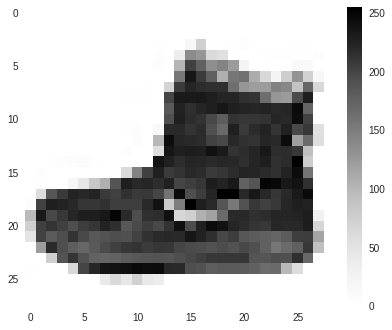

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

**数据预处理，归一化操作**

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

**构建网络模型**

该网络中的第一层 tf.keras.layers.Flatten 将图像格式从二维数组（28x28 像素）转换成一维数组（28 * 28 = 784 像素）。可以将该层视为图像中像素未堆叠的行，并排列这些行。该层没有要学习的参数；它只改动数据的格式。

在扁平化像素之后，该网络包含两个 tf.keras.layers.Dense 层的序列。这些层是密集连接或全连接神经层。第一个 Dense 层具有 128 个节点（或神经元）。第二个（也是最后一个）层是具有 10 个节点的 softmax 层，该层会返回一个具有 10 个概率得分的数组，这些得分的总和为 1。每个节点包含一个得分，表示当前图像属于 10 个类别中某一个的概率。


In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

模型反向传递

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**训练模型**

In [0]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.5047 - acc: 0.8238
Epoch 2/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.3749 - acc: 0.8630
Epoch 3/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.3347 - acc: 0.8773
Epoch 4/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.3107 - acc: 0.8855
Epoch 5/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.2941 - acc: 0.8915


**测试模型**

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc,' Test loss:',test_loss)

10000/10000 [==============================] - 0s 29us/step
Test accuracy: 0.864  Test loss: 0.3883624930739403
